## Final Project Submission

Please fill out:
* Student name: SAMWEL ONGECHI
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: George Kamundia
* Blog post URL:
# Phase 1 Project: Aviation Accident Risk Analysis for Business Recommendations

## Project Title: Aviation Risk Analysis for Business Recommendations

### Introduction
This notebook analyzes NTSB civil aviation accident data (assumed 1962-2023)
To identify aircraft models with potentially lower risk profiles.
The goal is to inform investment decisions for a new commercial/private aviation venture
by providing data-driven insights and specific recommendations.
# **Methodology:**
#### 1. Load and initially explore the raw data.
#### 2. Clean and prepare the data (handle missing values, types, standardize names & values).
#### 3. Filter data to the relevant scope (e.g., recent years, specific aircraft types/uses).
#### 4. Perform Exploratory Data Analysis (EDA) on the cleaned, filtered data.
#### 5. Define and calculate risk metrics incorporating accident severity (fatality rates, severe damage rates).
#### 6. Analyze and visualize risk profiles across different aircraft makes and models.
#### 7. Conclude with specific, actionable recommendations based on the findings.

# Setup and Data Loading

In [114]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#data loading data_path is "data\AviationData.csv"
df_raw = pd.read_csv("data\Aviation_Data.csv", encoding='latin-1')
df_raw.head()

<ipython-input-115-a2a490395a51>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("data\Aviation_Data.csv", encoding='latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Data Familiarization and Initial Assessment
Gaining an initial overview of the data's structure, types, missing values, and content

In [116]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [117]:
df_raw.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [118]:
df_raw.head(5)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [119]:
df_raw.tail(5)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [120]:
df_raw.shape

(90348, 31)

In [121]:
#Missing Values Summary
missing_summary = df_raw.isnull().sum()
missing_percentage = (missing_summary / len(df_raw)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage (%)': missing_percentage
})

print(missing_df)


                        Missing Values  Percentage (%)
Event.Id                          1459        1.614867
Investigation.Type                   0        0.000000
Accident.Number                   1459        1.614867
Event.Date                        1459        1.614867
Location                          1511        1.672422
Country                           1685        1.865011
Latitude                         55966       61.944924
Longitude                        55975       61.954886
Airport.Code                     40099       44.382831
Airport.Name                     37558       41.570372
Injury.Severity                   2459        2.721698
Aircraft.damage                   4653        5.150086
Aircraft.Category                58061       64.263736
Registration.Number               2776        3.072564
Make                              1522        1.684597
Model                             1551        1.716695
Amateur.Built                     1561        1.727764
Number.of.

###  Data Cleaning and Preparation
#### Cleaning the data to make it suitable for analysis. This will involve:
**.** **Standardizing column names*
**.** **Dropping irrelevant column*
 **.** **Correcting data types*
 **.** **Handling missing values appropriately (dropping rows/imputing)*
 **.** **Standardizing categorical values*
 **.** **Feature engineering (creating useful columns)*

In [122]:
#Create a Working Copy
df_cleaned = df_raw.copy()

#Standardizing Column Names
df_cleaned.columns = df_cleaned.columns.str.lower()
print(df_cleaned.columns.to_list())

['event.id', 'investigation.type', 'accident.number', 'event.date', 'location', 'country', 'latitude', 'longitude', 'airport.code', 'airport.name', 'injury.severity', 'aircraft.damage', 'aircraft.category', 'registration.number', 'make', 'model', 'amateur.built', 'number.of.engines', 'engine.type', 'far.description', 'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured', 'weather.condition', 'broad.phase.of.flight', 'report.status', 'publication.date']


In [123]:
#Dropping Irrelevant or Excessively Missing Columns
cols_to_drop = ['event.id', 'accident.number', 'latitude', 'longitude', 'airport.code', 'airport.name',
                    'registration.number', 'far.description', 'schedule', 'air.carrier', 'publication.date']
df_cleaned.drop(columns=cols_to_drop, errors='ignore', inplace=True)
print(df_cleaned.columns.to_list())

['investigation.type', 'event.date', 'location', 'country', 'injury.severity', 'aircraft.damage', 'aircraft.category', 'make', 'model', 'amateur.built', 'number.of.engines', 'engine.type', 'purpose.of.flight', 'total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured', 'weather.condition', 'broad.phase.of.flight', 'report.status']


In [124]:
 # Converting numeric fields to numeric data type
numeric_cols = ['number.of.engines', 'total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured']
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [125]:
 # Droping rows with missing key details for analysis
required_cols = ['make', 'model', 'injury.severity', 'aircraft.damage']
df_cleaned.dropna(subset=required_cols, inplace=True)

In [126]:
#Correct Data Types (Convertint date column to datetime)
df_cleaned['event.date'] = pd.to_datetime(df_cleaned['event.date'], format='%Y-%m-%d')

#Dropping rows where the essential date couldn't be parsed
df_cleaned.dropna(subset=['event.date'], inplace=True)
print(f"\nShape after handling invalid dates: {df_cleaned.shape}")


Shape after handling invalid dates: (85121, 20)


In [127]:
# Identify potential numeric columns (handle NaNs before int conversion)
numeric_cols = ['number.of.engines', 'total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured']

# Convert numeric columns to integer
for col in numeric_cols:
	 df_cleaned[col].fillna(0, inplace=True)
df_cleaned[col] = df_cleaned[col].astype(int)	
df_cleaned[col] = pd.to_numeric(df_cleaned[col])


# Handling Missing Values

In [128]:
  # Engine Info:** Impute with mode

df_cleaned['number.of.engines'].fillna(df_cleaned['number.of.engines'].mode()[0], inplace=True)
df_cleaned['number.of.engines'] = df_cleaned['number.of.engines'].astype('Int64')

# **Critical Columns:** Fill categorical values with 'Unknown' in missing Make, Model, Injury Severity, Aircraft Damage
categorical_cols_to_fill = ['purpose.of.flight', 'broad.phase.of.flight', 'weather.condition', 'country', 'location', 'amateur.built', 'aircraft.category']
for col in categorical_cols_to_fill:
        if col in df_cleaned.columns:
            df_cleaned[col].fillna('Unknown', inplace=True)

 # Verify remaining missing values
print("\n--- Remaining Missing Values Check ---")
print(df_cleaned.isnull().sum().sort_values(ascending=False).head())


--- Remaining Missing Values Check ---
engine.type              5408
report.status            4861
event.date                  0
broad.phase.of.flight       0
weather.condition           0
dtype: int64


### Standardize Categorical Values
 Clean critical text fields like Make, Model, Severity, Damage, Purpose

In [129]:
     # Standardize text values
for col in ['make', 'model', 'injury_severity', 'aircraft_damage', 'purpose_of_flight']:
        if col in df_cleaned:
            df_cleaned[col] = df_cleaned[col].str.upper().str.strip()


### Feature Engineering
Creating columns useful and narrowing down the dataset to recent, relevant records aligned with business goals for analysis


In [130]:
# Year and Month
df_cleaned['year'] = df_cleaned['event.date'].dt.year
df_cleaned['month'] = df_cleaned['event.date'].dt.month

 # Combined Aircraft Type (Make + Model)
df_cleaned['combined_aircraft_type'] = df_cleaned['make'] + ' ' + df_cleaned['model']

if not df_cleaned.empty:
    df_filtered = df_cleaned.copy()
    df_filtered = df_filtered[df_filtered['year'] >= 1985]
    if 'purpose_of_flight' in df_filtered:
        valid_purposes = ['PERSONAL', 'INSTRUCTIONAL', 'BUSINESS', 'COMMERCIAL', 'POSITIONING', 'FERRY', 'EXECUTIVE/CORPORATE', 'AERIAL APPLICATION', 'AIR RACE/SHOW']
        df_filtered = df_filtered[df_filtered['purpose.of.flight'].isin(valid_purposes)]
    if 'amateur_built' in df_filtered:
        df_filtered = df_filtered[df_filtered['amateur.built'] != 'YES']
    if 'investigation_type' in df_filtered:
        df_filtered = df_filtered[df_filtered['investigation.type'] == 'ACCIDENT']
if 'injury_severity' in df_filtered:
		  df_filtered = df_filtered[df_filtered['injury.severity'] != 'UNKNOWN']
if 'aircraft_damage' in df_filtered:
		  df_filtered = df_filtered[df_filtered['aircraft.damage'] != 'UNKNOWN']


# Exploratory Data Analysis (EDA) on Filtered Data
Exploring the characteristics of the final, filtered dataset. Analyzing trends and distributions to generate insights for investment recommendations, specifically identifying low-risk aircraft model(s) for the company to consider in their new business venture.

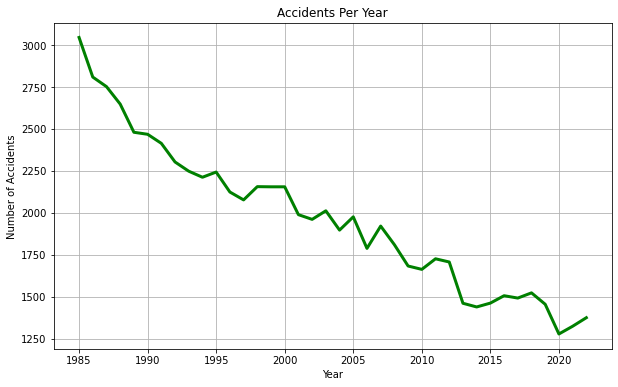

In [131]:
# Accident trend by year
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=df_filtered['year'].value_counts().sort_index().index,
                 y=df_filtered['year'].value_counts().sort_index().values, color='green', linewidth=3)

plt.title('Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


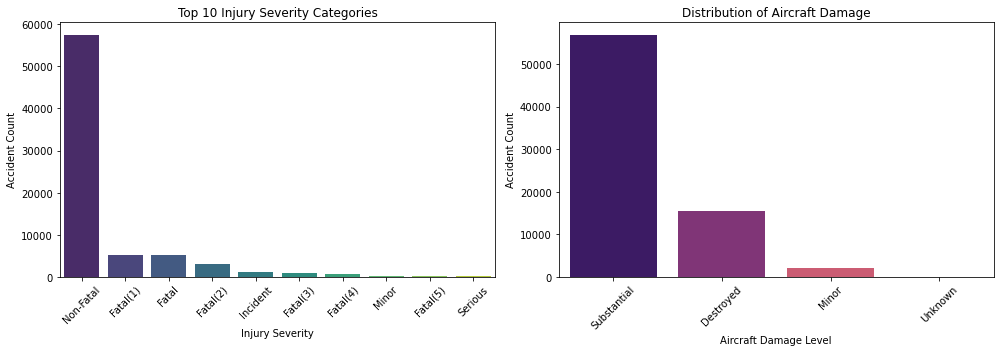

In [132]:
# Injury Severity + Full Damage Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top 10 Injury Severity Categories
top10_severity = df_filtered['injury.severity'].value_counts().nlargest(10).index

sns.countplot(
    ax=axes[0],
    data=df_filtered[df_filtered['injury.severity'].isin(top10_severity)],
    x='injury.severity',
    order=top10_severity,
    palette='viridis'
)
axes[0].set_title('Top 10 Injury Severity Categories')
axes[0].set_xlabel('Injury Severity')
axes[0].set_ylabel('Accident Count')
axes[0].tick_params(axis='x', rotation=45)

# Full Aircraft Damage Distribution
sns.countplot(
    ax=axes[1],
    data=df_filtered,
    x='aircraft.damage',
    order=df_filtered['aircraft.damage'].value_counts().index,
    palette='magma'
)
axes[1].set_title('Distribution of Aircraft Damage')
axes[1].set_xlabel('Aircraft Damage Level')
axes[1].set_ylabel('Accident Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Risk Analysis by Aircraft Type (Make & Model)
Calculating and comparing risk metrics across different aircraft types by defining two key indicators: the percentage of fatal accidents and the percentage of accidents involving severe damage. We then identify the aircraft types with the lowest risk rates.


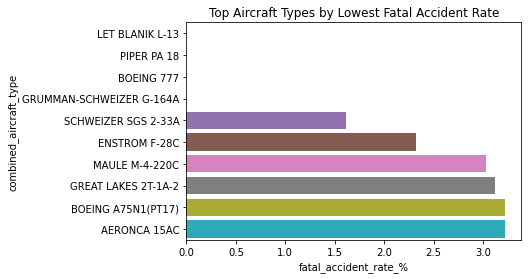

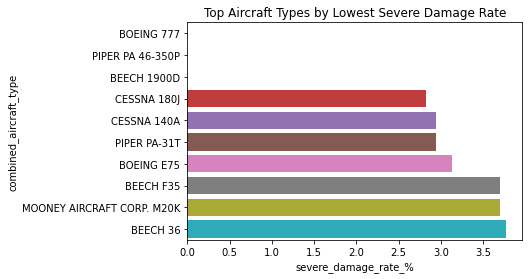

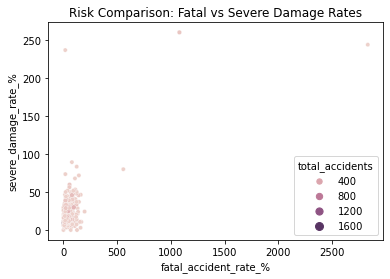

In [133]:
#Define Risk Metrics & Aggregation Threshold
threshold = 25  # Only aircraft types with at least 25 accidents will be included in the comparison — to ensure statistical significance (avoid making conclusions based on very small data).

#Count total accidents per type
type_counts = df_filtered['combined_aircraft_type'].value_counts() 
valid_types = type_counts[type_counts >= threshold].index
df_subset = df_filtered[df_filtered['combined_aircraft_type'].isin(valid_types)]

risk = df_subset.groupby('combined_aircraft_type').agg(
	total_accidents=('combined_aircraft_type', 'count'),
	total_fatal=('total.fatal.injuries', 'sum'),
	total_severe_damage=('total.serious.injuries', 'sum')).reset_index()

#Fatal Accident Rate (%), Severe Damage Rate (%)
risk['fatal_accident_rate_%'] = (risk['total_fatal'] / risk['total_accidents']) * 100
risk['severe_damage_rate_%'] = (risk['total_severe_damage'] / risk['total_accidents']) * 100

 # Visualize top low-risk aircraft types
 #Aircraft Types by Lowest Fatal Accident Rate
sns.barplot(data=risk.sort_values(by='fatal_accident_rate_%').head(10), y='combined_aircraft_type', x='fatal_accident_rate_%')
plt.title('Top Aircraft Types by Lowest Fatal Accident Rate')
plt.show()

#Aircraft Types by Lowest Severe Damage Rate
sns.barplot(data=risk.sort_values(by='severe_damage_rate_%').head(10), y='combined_aircraft_type', x='severe_damage_rate_%')
plt.title('Top Aircraft Types by Lowest Severe Damage Rate')
plt.show()

#Fatal vs Severe Damage Rates
sns.scatterplot(data=risk, x='fatal_accident_rate_%', y='severe_damage_rate_%', size='total_accidents', hue='total_accidents')
plt.title('Risk Comparison: Fatal vs Severe Damage Rates')
plt.show()

# Conclusions & Recommendations
Summarizing key findings and providing actionable recommendations on low-risk aircraft for the company to consider for investment, based on the data.

In [134]:
print("\n--- Conclusions ---")
low_fatal = risk['fatal_accident_rate_%'].quantile(0.25)
low_damage = risk['severe_damage_rate_%'].quantile(0.25)
recommended = risk[(risk['fatal_accident_rate_%'] <= low_fatal) & (risk['severe_damage_rate_%'] <= low_damage)]

print(f"Recommended Aircraft Types (Top 5):")

# Getting the top 5 aircraft types for both categories
lowest_fatal_accident_rate = risk.sort_values(by='fatal_accident_rate_%').head(5)['combined_aircraft_type']
lowest_severe_damage_rate = risk.sort_values(by='severe_damage_rate_%').head(5)['combined_aircraft_type']

# Printing the header for both columns
print(f"\nTop 5 Aircraft Types by Lowest Fatal Accident Rate  |  Top 5 Aircraft Types by Lowest Severe Damage Rate:")
print("-" * 100)  # Add a separator line for clarity

# Looping to print the results side by side in two columns
for fatal_model, damage_model in zip(lowest_fatal_accident_rate, lowest_severe_damage_rate):
    print(f"{fatal_model:<50} | {damage_model}")

# the 5 worst-performing aircraft types (the ones with the highest fatal accident and severe damage rates).
print("\n**Caution Advised for These Models:**")
for model in risk.sort_values(by=['fatal_accident_rate_%', 'severe_damage_rate_%'], ascending=False)['combined_aircraft_type'].head(5):
      print(f"- {model}")


--- Conclusions ---
Recommended Aircraft Types (Top 5):

Top 5 Aircraft Types by Lowest Fatal Accident Rate  |  Top 5 Aircraft Types by Lowest Severe Damage Rate:
----------------------------------------------------------------------------------------------------
LET BLANIK L-13                                    | BOEING 777
PIPER PA 18                                        | PIPER PA 46-350P
BOEING 777                                         | BEECH 1900D
GRUMMAN-SCHWEIZER G-164A                           | CESSNA 180J
SCHWEIZER SGS 2-33A                                | CESSNA 140A

**Caution Advised for These Models:**
- BOEING 737-200
- BOEING 737
- BOEING 737-300
- BEECH 1900C
- BEECH 200


In [135]:
#Full List of Aircraft Risk Scores
print(risk.sort_values(by=['fatal_accident_rate_%', 'severe_damage_rate_%'], ascending=False))

       combined_aircraft_type  total_accidents  total_fatal  \
93             BOEING 737-200               32        906.0   
92                 BOEING 737              125       1348.0   
94             BOEING 737-300               30        167.0   
21                BEECH 1900C               33         65.0   
23                  BEECH 200               75        124.0   
..                        ...              ...          ...   
425       SCHWEIZER SGS 2-33A               62          1.0   
288           LET BLANIK L-13               34          0.0   
317               PIPER PA 18               27          0.0   
273  GRUMMAN-SCHWEIZER G-164A               49          0.0   
96                 BOEING 777               27          0.0   

     total_severe_damage  fatal_accident_rate_%  severe_damage_rate_%  
93                  78.0            2831.250000            243.750000  
92                 325.0            1078.400000            260.000000  
94                  24.0   

In [136]:
#Top Aircraft Models by Accident Count
top_accident_models = risk.sort_values(by='total_accidents', ascending=False).head(10)['combined_aircraft_type']
print(top_accident_models)

115         CESSNA 152
119         CESSNA 172
132        CESSNA 172N
351    PIPER PA-28-140
131        CESSNA 172M
104         CESSNA 150
133        CESSNA 172P
149         CESSNA 182
143         CESSNA 180
327        PIPER PA-18
Name: combined_aircraft_type, dtype: object


In [137]:
#Top 10 Models with Lowest Fatality Rates
low_fatal = risk['fatal_accident_rate_%'].quantile(0.25)
low_fatal_models = risk[risk['fatal_accident_rate_%'] <= low_fatal].sort_values(by='fatal_accident_rate_%').head(10)['combined_aircraft_type']
print(low_fatal_models)

96                   BOEING 777
273    GRUMMAN-SCHWEIZER G-164A
317                 PIPER PA 18
288             LET BLANIK L-13
425         SCHWEIZER SGS 2-33A
256               ENSTROM F-28C
294              MAULE M-4-220C
263         GREAT LAKES 2T-1A-2
3                  AERONCA 15AC
98           BOEING A75N1(PT17)
Name: combined_aircraft_type, dtype: object


In [138]:
#Top 10 Models with Lowest Severe Damage
low_damage = risk['severe_damage_rate_%'].quantile(0.25)
low_damage_models = risk[risk['severe_damage_rate_%'] <= low_damage].sort_values(by='severe_damage_rate_%').head(10)['combined_aircraft_type'].copy()
print(low_damage_models)

322              PIPER PA 46-350P
22                    BEECH 1900D
96                     BOEING 777
147                   CESSNA 180J
370                  PIPER PA-31T
103                   CESSNA 140A
100                    BOEING E75
300    MOONEY AIRCRAFT CORP. M20K
55                      BEECH F35
27                       BEECH 36
Name: combined_aircraft_type, dtype: object


In [139]:
#saving copies of df_cleaned, df_filtered and risk_analysis dataframe 
# df_cleaned.to_csv('df_cleaned.csv', index=False)
# df_filtered.to_csv('df_filtered.csv', index=False)
# risk.to_csv('risk_analysis.csv', index=False)
# top_accident_models.to_csv('top_accident_models.csv', index=False)
#low_fatal_models.to_csv('low_fatal_models.csv', index=False)
#low_damage_models.to_csv('low_damage_models.csv', index=False)